# Pandas Data Manipulation Tutorial
In this notebook, we'll explore different types of data manipulation operations in pandas using a sample employee dataset.

In [10]:
import pandas as pd

data = {
    "EmployeeID": [101, 102, 103, 104, 105],
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "Department": ["HR", "Finance", "HR", "IT", "Finance"],
    "Salary": [50000, 60000, 55000, 70000, 62000],
    "JoiningDate": pd.to_datetime(["2020-01-10", "2019-06-25", "2021-03-15", "2018-07-01", "2022-02-20"])
}

df = pd.DataFrame(data)
df

,EmployeeID,Name,Department,Salary,JoiningDate
0,101,Alice,HR,50000,2020-01-10
1,102,Bob,Finance,60000,2019-06-25
2,103,Charlie,HR,55000,2021-03-15
3,104,David,IT,70000,2018-07-01
4,105,Eva,Finance,62000,2022-02-20


## Data Inspection

In [2]:
df.head()
df.info()
df.describe()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   EmployeeID   5 non-null      int64         
 1   Name         5 non-null      object        
 2   Department   5 non-null      object        
 3   Salary       5 non-null      int64         
 4   JoiningDate  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 332.0+ bytes


EmployeeID              int64
Name                   object
Department             object
Salary                  int64
JoiningDate    datetime64[ns]
dtype: object

## Column Operations

In [11]:
# Rename column
df.rename(columns={"Salary": "AnnualSalary"}, inplace=True)

# Add new column
df["Bonus"] = df["AnnualSalary"] * 0.10

# Drop a column
df = df.drop("EmployeeID", axis=1)
df

,Name,Department,AnnualSalary,JoiningDate,Bonus
0,Alice,HR,50000,2020-01-10,5000.0
1,Bob,Finance,60000,2019-06-25,6000.0
2,Charlie,HR,55000,2021-03-15,5500.0
3,David,IT,70000,2018-07-01,7000.0
4,Eva,Finance,62000,2022-02-20,6200.0


## Row Filtering

In [16]:
# Filter rows (select * from employee(table_name) where Department = 'HR)
df1 = df[df["Department"] == "HR"]

# Multiple conditions
df2 = df[(df["AnnualSalary"] > 61000) & (df["Department"] == "Finance")]
df2

,Name,Department,AnnualSalary,JoiningDate,Bonus
4,Eva,Finance,62000,2022-02-20,6200.0


## Sorting

In [ ]:
#query ( select * from employess order by AnnualSalary desc)
df2 = df.sort_values(by="AnnualSalary", ascending=False)
df2

,Name,Department,AnnualSalary,JoiningDate,Bonus
3,David,IT,70000,2018-07-01,7000.0
4,Eva,Finance,62000,2022-02-20,6200.0
1,Bob,Finance,60000,2019-06-25,6000.0
2,Charlie,HR,55000,2021-03-15,5500.0
0,Alice,HR,50000,2020-01-10,5000.0


## GroupBy and Aggregation

In [ ]:
# query - select Department, avg(AnnualSalary) as AverageSalaryByDepartment from Employee group by Department
# df2 = df.groupby("Department")["AnnualSalary"].mean()

# df2
df3 = df.groupby("Department")["Name"].count()
df3

Department
Finance    2
HR         2
IT         1
Name: Name, dtype: int64

## Missing Data Handling

In [ ]:
df.loc[2, "Bonus"] = None #updated 3rd row on Bonus Column with None Value
df.isnull()
#query - update employee set Bonus = 0 where Bonus is Null
df["Bonus"].fillna(0, inplace=True)
df

/var/folders/9k/84y4nb_x0bl39h9vs7wd0jr00000gn/T/ipykernel_13481/580404880.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Bonus"].fillna(0, inplace=True)


,Name,Department,AnnualSalary,JoiningDate,Bonus
0,Alice,HR,50000,2020-01-10,5000.0
1,Bob,Finance,60000,2019-06-25,6000.0
2,Charlie,HR,55000,2021-03-15,0.0
3,David,IT,70000,2018-07-01,7000.0
4,Eva,Finance,62000,2022-02-20,6200.0


## Apply Function

In [ ]:
#query - update Employee set SalaryGrade = case AnnualSalary > 60000 return "High" else "Medium"
df["SalaryGrade"] = df["AnnualSalary"].apply(lambda x: "High" if x > 60000 else "Medium")

In [27]:
df

,Name,Department,AnnualSalary,JoiningDate,Bonus,SalaryGrade
0,Alice,HR,50000,2020-01-10,5000.0,Medium
1,Bob,Finance,60000,2019-06-25,6000.0,Medium
2,Charlie,HR,55000,2021-03-15,0.0,Medium
3,David,IT,70000,2018-07-01,7000.0,High
4,Eva,Finance,62000,2022-02-20,6200.0,High


## Merging and Joining

In [29]:
#consider employee, department_manager
# select * , dm.manager from employee 
# left join department_manager dm on employee.department = department_manager.department
dept_info = pd.DataFrame({
    "Department": ["HR", "Finance", "IT"],
    "Manager": ["John", "Amy", "Raj"]
})

df1 = pd.merge(df, dept_info, on="Department", how="left")
df1

,Name,Department,AnnualSalary,JoiningDate,Bonus,SalaryGrade,Manager
0,Alice,HR,50000,2020-01-10,5000.0,Medium,John
1,Bob,Finance,60000,2019-06-25,6000.0,Medium,Amy
2,Charlie,HR,55000,2021-03-15,0.0,Medium,John
3,David,IT,70000,2018-07-01,7000.0,High,Raj
4,Eva,Finance,62000,2022-02-20,6200.0,High,Amy


## Pivot Table

In [30]:
pd.pivot_table(df, values="AnnualSalary", index="Department", aggfunc="mean")

,AnnualSalary
Department,
Finance,61000.0
HR,52500.0
IT,70000.0


## Datetime Operations

In [32]:
df["JoiningYear"] = df["JoiningDate"].dt.year
#todo joiningyear-month 
df

,Name,Department,AnnualSalary,JoiningDate,Bonus,SalaryGrade,JoiningYear
0,Alice,HR,50000,2020-01-10,5000.0,Medium,2020
1,Bob,Finance,60000,2019-06-25,6000.0,Medium,2019
2,Charlie,HR,55000,2021-03-15,0.0,Medium,2021
3,David,IT,70000,2018-07-01,7000.0,High,2018
4,Eva,Finance,62000,2022-02-20,6200.0,High,2022


## Export to CSV

In [33]:
df.to_csv("final_employee_data.csv", index=False)

## Complex Use Cases in Data Manipulation

### Conditional Column Creation with Multiple Conditions

In [34]:
import numpy as np

# Add a column 'PerformanceLevel' based on salary and department
df["PerformanceLevel"] = np.where(
    (df["AnnualSalary"] > 60000) & (df["Department"] == "IT"),
    "Excellent",
    np.where(df["AnnualSalary"] > 55000, "Good", "Average")
)
df


# if annualsalary > 60000 and department == "IT":
#   return "Excellent"
# else:
    # if annualsalary > 55000: return "Good"
    # else return "Average"

,Name,Department,AnnualSalary,JoiningDate,Bonus,SalaryGrade,JoiningYear,PerformanceLevel
0,Alice,HR,50000,2020-01-10,5000.0,Medium,2020,Average
1,Bob,Finance,60000,2019-06-25,6000.0,Medium,2019,Good
2,Charlie,HR,55000,2021-03-15,0.0,Medium,2021,Average
3,David,IT,70000,2018-07-01,7000.0,High,2018,Excellent
4,Eva,Finance,62000,2022-02-20,6200.0,High,2022,Good


### Reshape with `melt()` and `pivot()`

In [36]:
# Melt the DataFrame to long format
df_melted = pd.melt(df, id_vars=["Name", "Department"], value_vars=["AnnualSalary", "Bonus"], var_name="Metric", value_name="Value")
df_melted.head()

# Pivot back to wide format
df_pivoted = df_melted.pivot_table(index=["Name", "Department"], columns="Metric", values="Value").reset_index()
df_pivoted

Metric,Name,Department,AnnualSalary,Bonus
0,Alice,HR,50000.0,5000.0
1,Bob,Finance,60000.0,6000.0
2,Charlie,HR,55000.0,0.0
3,David,IT,70000.0,7000.0
4,Eva,Finance,62000.0,6200.0


### Window Functions (`rolling`, `expanding`)

In [39]:
# Sort by date to apply rolling window
df_sorted = df.sort_values(by="JoiningDate")

# Rolling average salary (window of 2)
df_sorted["RollingSalaryAvg"] = df_sorted["AnnualSalary"].rolling(window=2).mean()

# Expanding mean salary
df_sorted["ExpandingSalaryAvg"] = df_sorted["AnnualSalary"].expanding().mean()
df_sorted

,Name,Department,AnnualSalary,JoiningDate,Bonus,SalaryGrade,JoiningYear,PerformanceLevel,RollingSalaryAvg,ExpandingSalaryAvg
3,David,IT,70000,2018-07-01,7000.0,High,2018,Excellent,NaN,70000.0
1,Bob,Finance,60000,2019-06-25,6000.0,Medium,2019,Good,65000.0,65000.0
0,Alice,HR,50000,2020-01-10,5000.0,Medium,2020,Average,55000.0,60000.0
2,Charlie,HR,55000,2021-03-15,0.0,Medium,2021,Average,52500.0,58750.0
4,Eva,Finance,62000,2022-02-20,6200.0,High,2022,Good,58500.0,59400.0


### Custom Group-based Operations

In [40]:
# Calculate mean salary for each department and subtract it from each employee's salary
df["SalaryDiffFromDeptAvg"] = df["AnnualSalary"] - df.groupby("Department")["AnnualSalary"].transform("mean")
df

,Name,Department,AnnualSalary,JoiningDate,Bonus,SalaryGrade,JoiningYear,PerformanceLevel,SalaryDiffFromDeptAvg
0,Alice,HR,50000,2020-01-10,5000.0,Medium,2020,Average,-2500.0
1,Bob,Finance,60000,2019-06-25,6000.0,Medium,2019,Good,-1000.0
2,Charlie,HR,55000,2021-03-15,0.0,Medium,2021,Average,2500.0
3,David,IT,70000,2018-07-01,7000.0,High,2018,Excellent,0.0
4,Eva,Finance,62000,2022-02-20,6200.0,High,2022,Good,1000.0


### Complex Filtering with `query()`

In [41]:
# Use query string for complex condition
df.query("AnnualSalary > 55000 and Department == 'Finance'")

,Name,Department,AnnualSalary,JoiningDate,Bonus,SalaryGrade,JoiningYear,PerformanceLevel,SalaryDiffFromDeptAvg
1,Bob,Finance,60000,2019-06-25,6000.0,Medium,2019,Good,-1000.0
4,Eva,Finance,62000,2022-02-20,6200.0,High,2022,Good,1000.0


In [46]:
# !pip install matplotlib
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


## Data Visualization with Matplotlib and Seaborn

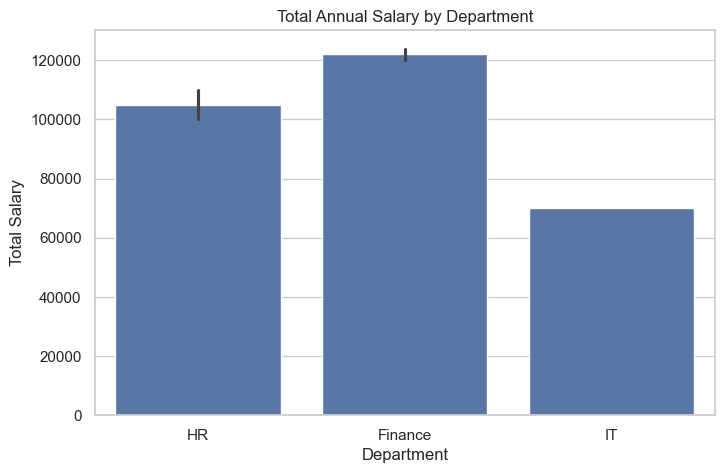

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Bar plot: Average salary by department
plt.figure(figsize=(8, 5))
sns.barplot(x="Department", y="AnnualSalary", data=df, estimator=sum)
plt.title("Total Annual Salary by Department")
plt.ylabel("Total Salary")
plt.show()

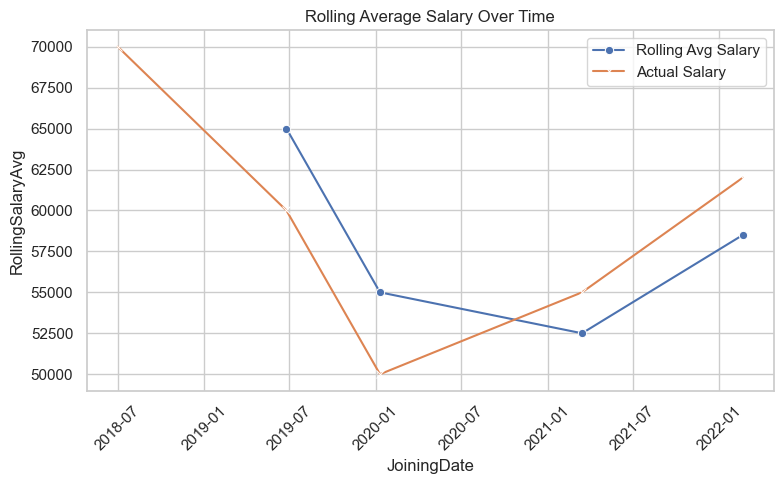

In [48]:
# Line plot: Rolling salary average
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_sorted, x="JoiningDate", y="RollingSalaryAvg", marker="o", label="Rolling Avg Salary")
sns.lineplot(data=df_sorted, x="JoiningDate", y="AnnualSalary", marker="x", label="Actual Salary")
plt.title("Rolling Average Salary Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Real-World Data API Integration Example

In [50]:
!pip install requests

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.4.2-cp311-cp311-macosx_10_9_universal2.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2025.4.26-py3-none-any.whl (159 kB)
Using cached charset_normalizer-3.4.2-cp311-cp311-macosx_10_9_universal2.whl (198 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.4.0-py3-none-any.whl (128 kB)


In [51]:
import requests

# Example API: COVID-19 data
url = "https://api.covid19api.com/dayone/country/india/status/confirmed"

response = requests.get(url)
data = response.json()

# Convert to DataFrame
covid_df = pd.DataFrame(data)[["Date", "Cases"]]
covid_df["Date"] = pd.to_datetime(covid_df["Date"])
covid_df.set_index("Date", inplace=True)
covid_df = covid_df.resample("W").sum()

covid_df.head()

ConnectionError: HTTPSConnectionPool(host='api.covid19api.com', port=443): Max retries exceeded with url: /dayone/country/india/status/confirmed (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x111eb43d0>: Failed to resolve 'api.covid19api.com' ([Errno 8] nodename nor servname provided, or not known)"))

In [ ]:
# Plot COVID-19 confirmed cases in India over time
plt.figure(figsize=(10, 5))
covid_df["Cases"].plot()
plt.title("Weekly COVID-19 Confirmed Cases in India")
plt.ylabel("Cases")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()